In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import scipy
import copy


---
FIR filters with firls
---


/Users/elliottevers/DocumentsTurbulent/virtual_environments/python_3_jupyter/lib/python3.7/site-packages/scipy/linalg/basic.py:1321: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  x, resids, rank, s = lstsq(a, b, cond=cond, check_finite=False)


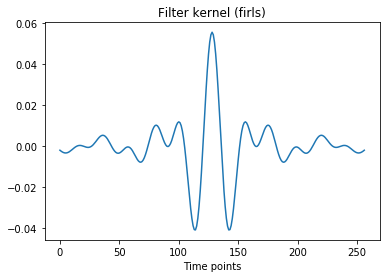

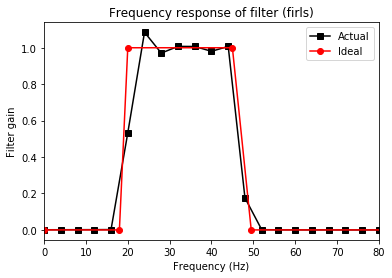

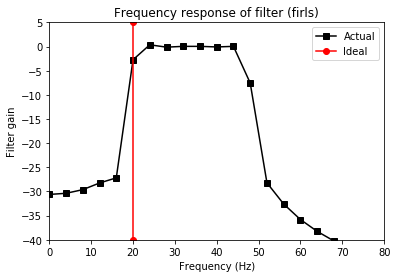

In [3]:
# filter parameters
srate   = 1024 # hz
nyquist = srate/2
frange  = [20,45]
transw  = .1
order   = int( 5*srate/frange[0] )

# order must be odd
if order%2==0:
    order += 1

# define filter shape
shape = [ 0, 0, 1, 1, 0, 0 ]
frex  = [ 0, frange[0]-frange[0]*transw, frange[0], frange[1], frange[1]+frange[1]*transw, nyquist ]

# filter kernel
filtkern = signal.firls(order,frex,shape,fs=srate)


# time-domain filter kernel
plt.plot(filtkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firls)')
plt.show()




# compute the power spectrum of the filter kernel
filtpow = np.abs(scipy.fftpack.fft(filtkern))**2
# compute the frequencies vector and remove negative frequencies
hz      = np.linspace(0,srate/2,int(np.floor(len(filtkern)/2)+1))
filtpow = filtpow[0:len(hz)]



# plot amplitude spectrum of the filter kernel
plt.plot(hz,filtpow,'ks-',label='Actual')
plt.plot(frex,shape,'ro-',label='Ideal')
plt.xlim([0,frange[0]*4])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firls)')
plt.show()



# Same as above but logarithmically scaled
plt.plot(hz,10*np.log10(filtpow),'ks-',label='Actual')
plt.plot([frange[0],frange[0]],[-40,5],'ro-',label='Ideal')
plt.xlim([0,frange[0]*4])
plt.ylim([-40,5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firls)')
plt.show()

/Users/elliottevers/DocumentsTurbulent/virtual_environments/python_3_jupyter/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


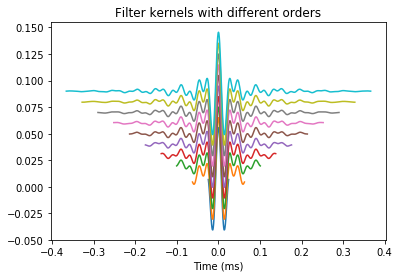

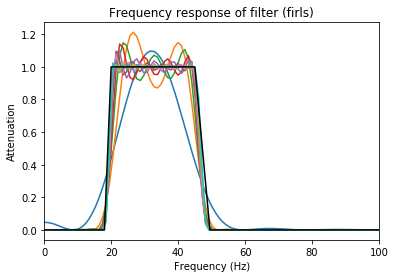

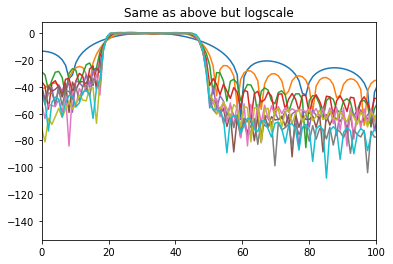

In [5]:
## effects of the filter kernel order

# range of orders
ordersF = ( 1*srate/frange[0]) / (srate/1000)
ordersL = (15*srate/frange[0]) / (srate/1000)

orders = np.round( np.linspace(ordersF,ordersL,10) )

# initialize
fkernX = np.zeros((len(orders),1000))
hz = np.linspace(0,srate,1000)


for oi in range(0,len(orders)):
    
    # make sure order is odd-length
    ord2use = orders[oi]+(1-orders[oi]%2)
    
    # create filter kernel
    fkern = signal.firls(ord2use,frex,shape,fs=srate)

    # take its FFT
    fkernX[oi,:] = np.abs(scipy.fftpack.fft(fkern,1000))**2
    
    # show in plot
    time = np.arange(0,ord2use)/srate
    time = time - np.mean(time)
    plt.plot(time,fkern+.01*oi)

plt.xlabel('Time (ms)')
plt.title('Filter kernels with different orders')
plt.show()

plt.plot(hz,fkernX.T)
plt.plot(frex,shape,'k')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (firls)')
plt.show()

plt.plot(hz,10*np.log10(fkernX.T))
plt.xlim([0,100])
plt.title('Same as above but logscale')
plt.show()

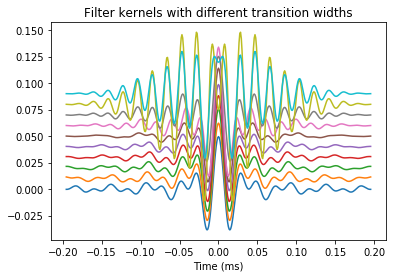

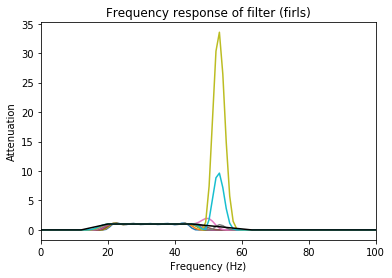

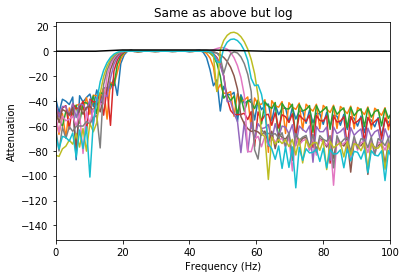

In [5]:
## effects of the filter transition width

# range of transitions
transwidths = np.linspace(.01,.4,10)

# initialize
fkernX = np.zeros((len(transwidths),1000))
hz = np.linspace(0,srate,1000)

for ti in range(0,len(transwidths)):
    
    # create filter kernel
    frex  = [ 0, frange[0]-frange[0]*transwidths[ti], frange[0], frange[1], frange[1]+frange[1]*transwidths[ti], nyquist ]
    fkern = signal.firls(401,frex,shape,fs=srate)
    n     = len(fkern)

    # take its FFT
    fkernX[ti,:] = np.abs(scipy.fftpack.fft(fkern,1000))**2
    
    # show in plot
    time = np.arange(0,401)/srate
    time = time - np.mean(time)
    plt.plot(time,fkern+.01*ti)
    
plt.xlabel('Time (ms)')
plt.title('Filter kernels with different transition widths')
plt.show()


plt.plot(hz,fkernX.T)
plt.plot(frex,shape,'k')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (firls)')
plt.show()


plt.plot(hz,10*np.log10(fkernX.T))
plt.plot(frex,shape,'k')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Same as above but log')
plt.show()


---
# FIR filters with fir1
---


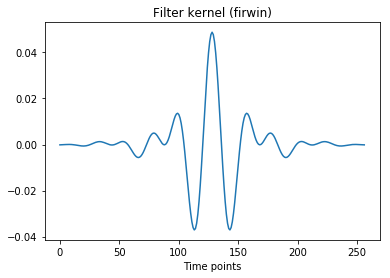

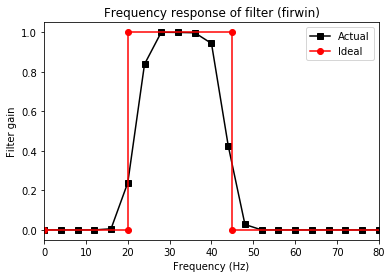

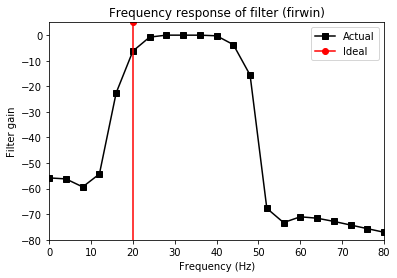

In [6]:
# filter parameters
srate   = 1024 # hz
nyquist = srate/2
frange  = [20,45]
transw  = .1
order   = int( 5*srate/frange[0] )

# force odd order
if order%2==0:
    order += 1

### --- NOTE: Python's firwin corresponds to MATLAB's fir1 --- ###

# filter kernel
filtkern = signal.firwin(order,frange,fs=srate,pass_zero=False)


# time-domain filter kernel
plt.plot(filtkern)
plt.xlabel('Time points')
plt.title('Filter kernel (firwin)')
plt.show()




# compute the power spectrum of the filter kernel
filtpow = np.abs(scipy.fftpack.fft(filtkern))**2
# compute the frequencies vector and remove negative frequencies
hz      = np.linspace(0,srate/2,int(np.floor(len(filtkern)/2)+1))
filtpow = filtpow[0:len(hz)]



# plot amplitude spectrum of the filter kernel
plt.plot(hz,filtpow,'ks-',label='Actual')
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'ro-',label='Ideal')
plt.xlim([0,frange[0]*4])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firwin)')
plt.show()



# Same as above but logarithmically scaled
plt.plot(hz,10*np.log10(filtpow),'ks-',label='Actual')
plt.plot([frange[0],frange[0]],[-100,5],'ro-',label='Ideal')
plt.xlim([0,frange[0]*4])
plt.ylim([-80,5])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Filter gain')
plt.legend()
plt.title('Frequency response of filter (firwin)')
plt.show()

/Users/elliottevers/DocumentsTurbulent/virtual_environments/python_3_jupyter/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


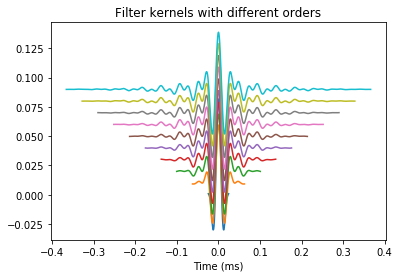

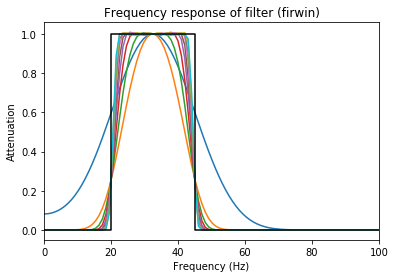

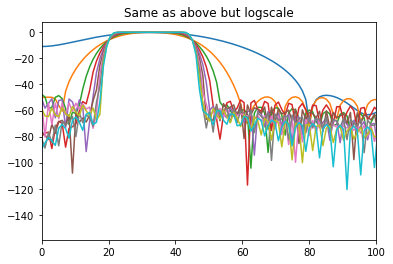

In [7]:
## effects of the filter kernel order

# range of orders
orders = np.round( np.linspace( (srate/frange[0]) / (srate/1000),(15*srate/frange[0]) / (srate/1000) ,10) )


# initialize
fkernX = np.zeros((len(orders),1000))
hz = np.linspace(0,srate,1000)


for oi in range(0,len(orders)):
    
    # make sure order is odd-length
    ord2use = orders[oi]+(1-orders[oi]%2)
    
    # create filter kernel
    fkern = signal.firwin(int(ord2use),frange,fs=srate,pass_zero=False)

    # take its FFT
    fkernX[oi,:] = np.abs(scipy.fftpack.fft(fkern,1000))**2
    
    # show in plot
    time = np.arange(0,ord2use)/srate
    time = time - np.mean(time)
    plt.plot(time,fkern+.01*oi)

plt.xlabel('Time (ms)')
plt.title('Filter kernels with different orders')
plt.show()

plt.plot(hz,fkernX.T)
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'k')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (firwin)')
plt.show()

plt.plot(hz,10*np.log10(fkernX.T))
plt.xlim([0,100])
plt.title('Same as above but logscale')
plt.show()


---
#IIR Butterworth filters
---


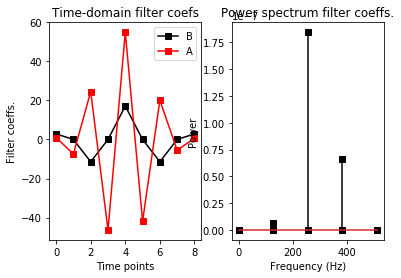

In [8]:
# filter parameters
srate   = 1024 # hz
nyquist = srate/2
frange  = [20,45]

# create filter coefficients
fkernB,fkernA = signal.butter(4,np.array(frange)/nyquist,btype='bandpass')

# power spectrum of filter coefficients
filtpow = np.abs(scipy.fftpack.fft(fkernB))**2
hz      = np.linspace(0,srate/2,int(np.floor(len(fkernB)/2)+1))


# plotting
plt.subplot(121)
plt.plot(fkernB*1e5,'ks-',label='B')
plt.plot(fkernA,'rs-',label='A')
plt.xlabel('Time points')
plt.ylabel('Filter coeffs.')
plt.title('Time-domain filter coefs')
plt.legend()

plt.subplot(122)
plt.stem(hz,filtpow[0:len(hz)],'ks-')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Power spectrum filter coeffs.')
plt.show()


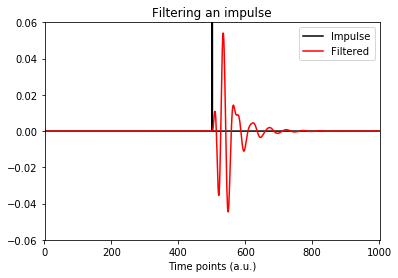

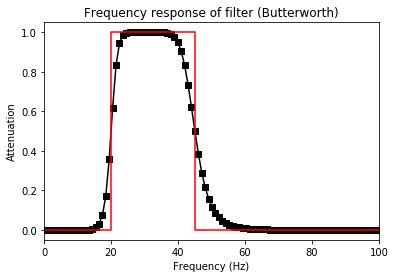

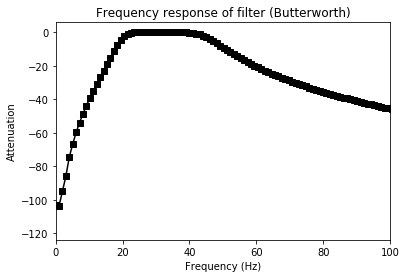

In [9]:
## how to evaluate an IIR filter: filter an impulse

# generate the impulse
impres = np.zeros(1001)
impres[501] = 1

# apply the filter
fimp = signal.lfilter(fkernB,fkernA,impres,axis=-1)

# compute power spectrum
fimpX = np.abs(scipy.fftpack.fft(fimp))**2
hz = np.linspace(0,nyquist,int(np.floor(len(impres)/2)+1))


# plot
plt.plot(impres,'k',label='Impulse')
plt.plot(fimp,'r',label='Filtered')
plt.xlim([1,len(impres)])
plt.ylim([-.06,.06])
plt.legend()
plt.xlabel('Time points (a.u.)')
plt.title('Filtering an impulse')
plt.show()

plt.plot(hz,fimpX[0:len(hz)],'ks-')
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'r')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth)')
plt.show()


plt.plot(hz,10*np.log10(fimpX[0:len(hz)]),'ks-')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth)')
plt.show()

/Users/elliottevers/DocumentsTurbulent/virtual_environments/python_3_jupyter/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


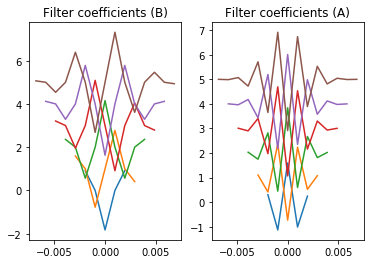

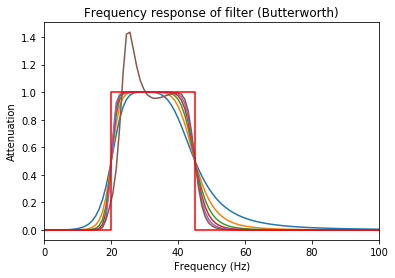

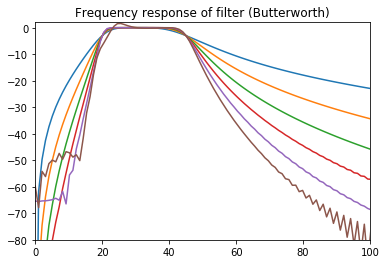

In [10]:
## effects of order parameter

orders = range(2,8)

fkernX = np.zeros((len(orders),1001))
hz = np.linspace(0,srate,1001)


# loop over orders
for oi in range(0,len(orders)):
    
    # create filter kernel
    fkernB,fkernA = signal.butter(orders[oi],np.array(frange)/nyquist,btype='bandpass')
    n = len(fkernB)
    
    # filter the impulse response and take its power
    fimp = signal.lfilter(fkernB,fkernA,impres,axis=-1)
    fkernX[oi,:] = np.abs(scipy.fftpack.fft(fimp))**2
    
    
    # show in plot
    time = np.arange(0,len(fkernB))/srate
    time = time - np.mean(time)
    plt.subplot(121)
    plt.plot(time,scipy.stats.zscore(fkernB)+oi)
    plt.title('Filter coefficients (B)')
    
    plt.subplot(122)
    plt.plot(time,scipy.stats.zscore(fkernA)+oi)
    plt.title('Filter coefficients (A)')

plt.show()


# plot the spectra
plt.plot(hz,fkernX.T)
plt.plot([0,frange[0],frange[0],frange[1],frange[1],nyquist],[0,0,1,1,0,0],'r')
plt.xlim([0,100])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Attenuation')
plt.title('Frequency response of filter (Butterworth)')
plt.show()

# in log space
plt.plot(hz,10*np.log10(fkernX.T))
plt.xlim([0,100])
plt.ylim([-80,2])
plt.title('Frequency response of filter (Butterworth)')
plt.show()


---
# Causal and zero-phase-shift filters
---


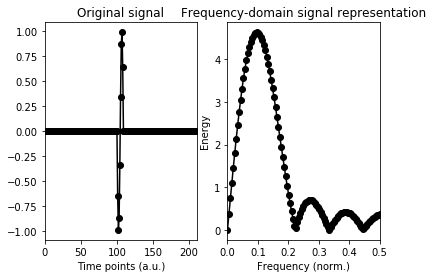

In [11]:
# create a simple signal
data = np.concatenate((np.zeros(100),np.cos(np.linspace(np.pi/2,5*np.pi/2,10)),np.zeros(100)),axis=0)
n = len(data)

# plot it and its power spectrum
plt.subplot(121)
plt.plot(range(0,n),data,'ko-')
plt.xlim([0,n+1])
plt.title('Original signal')
plt.xlabel('Time points (a.u.)')

plt.subplot(122)
plt.plot(np.linspace(0,1,n),np.abs(scipy.fftpack.fft(data)),'ko-')
plt.xlim([0,.5])
plt.xlabel('Frequency (norm.)')
plt.ylabel('Energy')
plt.title('Frequency-domain signal representation')
plt.show()

/Users/elliottevers/DocumentsTurbulent/virtual_environments/python_3_jupyter/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


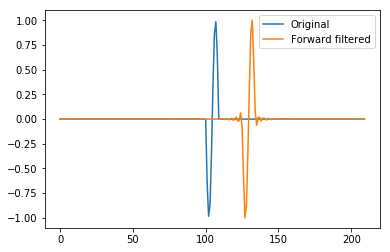

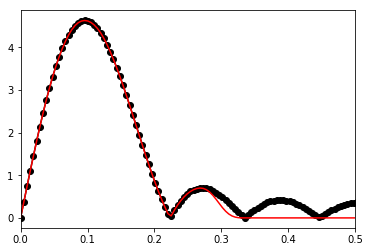

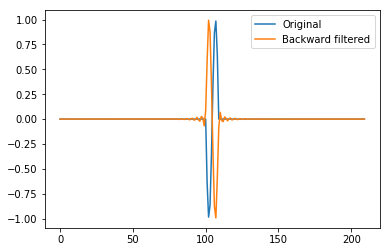

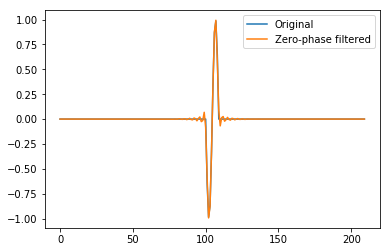

In [12]:
## apply a low-pass causal filter

# note: frequency listed as fraction of Nyquist (not sampling rate!)
fkern = signal.firwin(51,.6)
fdata = signal.lfilter(fkern,1,data)
plt.plot(range(0,n),data,label='Original')
plt.plot(range(0,n),fdata,label='Forward filtered')
plt.legend()
plt.show()

# flip the signal backwards
fdataFlip = fdata[::-1]
# and show its spectrum
plt.plot(np.linspace(0,1,n),np.abs(scipy.fftpack.fft(data)),'ko-')
plt.plot(np.linspace(0,1,n),np.abs(scipy.fftpack.fft(fdataFlip)),'r')
plt.xlim([0,.5])
plt.show()


# filter the flipped signal
fdataF = signal.lfilter(fkern,1,fdataFlip)
plt.plot(range(0,n),data,label='Original')
plt.plot(range(0,n),fdataF,label='Backward filtered')
plt.legend()
plt.show()

# finally, flip the double-filtered signal
fdataF = fdataF[::-1]
plt.plot(range(0,n),data,label='Original')
plt.plot(range(0,n),fdataF,label='Zero-phase filtered')
plt.legend()
plt.show()



---
# Avoid edge effects with reflection
---


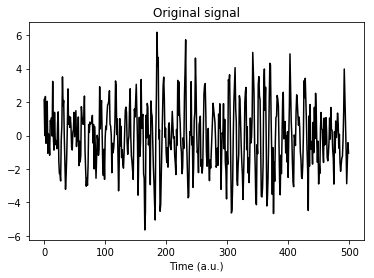

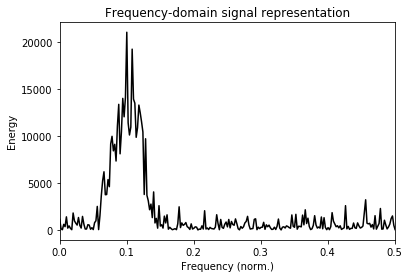

In [13]:
# create a signal
N  = 500
hz = np.linspace(0,1,N)
gx = np.exp( -(4*np.log(2)*(hz-.1)/.1)**2 )*N/2
data = np.real(scipy.fftpack.ifft( gx*np.exp(1j*np.random.rand(N)*2*np.pi) ))
data = data + np.random.randn(N)

# plot it and its power spectrum
plt.plot(range(0,N),data,'k')
plt.title('Original signal')
plt.xlabel('Time (a.u.)')
plt.show()

plt.plot(hz,np.abs(scipy.fftpack.fft(data))**2,'k')
plt.xlim([0,.5])
plt.xlabel('Frequency (norm.)')
plt.ylabel('Energy')
plt.title('Frequency-domain signal representation')
plt.show()

/Users/elliottevers/DocumentsTurbulent/virtual_environments/python_3_jupyter/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


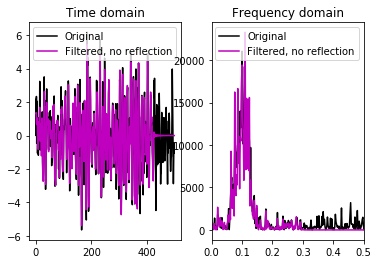

In [14]:
## apply a low-pass causal filter

# generate filter kernel
order = 151
fkern = signal.firwin(order,.6)

# zero-phase-shift filter
fdata = signal.lfilter(fkern,1,data) # forward
fdata = signal.lfilter(fkern,1,np.flip(fdata,0)) # reverse
fdata = np.flip(fdata,0) # flip forward


# plot the original signal and filtered version
plt.subplot(121)
plt.plot(range(0,N),data,'k',label='Original')
plt.plot(range(0,N),fdata,'m',label='Filtered, no reflection')
plt.title('Time domain')
plt.legend()

# power spectra
plt.subplot(122)
plt.plot(hz,np.abs(scipy.fftpack.fft(data))**2,'k',label='Original')
plt.plot(hz,np.abs(scipy.fftpack.fft(fdata))**2,'m',label='Filtered, no reflection')
plt.title('Frequency domain')
plt.xlim([0,.5])
plt.legend()
plt.show()

/Users/elliottevers/DocumentsTurbulent/virtual_environments/python_3_jupyter/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/Users/elliottevers/DocumentsTurbulent/virtual_environments/python_3_jupyter/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/elliottevers/DocumentsTurbulent/virtual_environments/python_3_jupyter/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: Fu

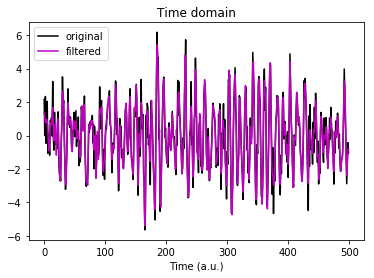

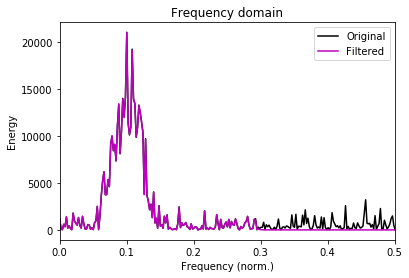

In [15]:
## now with reflection by filter order

# reflect the signal
# data = np.concatenate((np.zeros(100),np.cos(np.linspace(np.pi/2,5*np.pi/2,10)),np.zeros(100)),axis=0)
reflectdata = np.concatenate( (data[order:0:-1],data,data[-1:-1-order:-1]) ,axis=0)

# zero-phase-shift filter on the reflected signal
reflectdata = signal.lfilter(fkern,1,reflectdata)
reflectdata = signal.lfilter(fkern,1,reflectdata[::-1])
reflectdata = reflectdata[::-1]

# now chop off the reflected parts
fdata = reflectdata[order:-order]

# try again with filtfilt
fdata1 = signal.filtfilt(fkern,1,data)

# and plot
plt.plot(range(0,N),data,'k',label='original')
plt.plot(range(0,N),fdata,'m',label='filtered')
# plt.plot(range(0,N),fdata1,'b',label='filtered1')
plt.xlabel('Time (a.u.)')
plt.title('Time domain')
plt.legend()
plt.show()


# spectra
plt.plot(hz,np.abs(scipy.fftpack.fft(data))**2,'k',label='Original')
plt.plot(hz,np.abs(scipy.fftpack.fft(fdata))**2,'m',label='Filtered')
plt.legend()
plt.xlim([0,.5])
plt.xlabel('Frequency (norm.)')
plt.ylabel('Energy')
plt.title('Frequency domain')
plt.show()


---
# Low-pass filters
---


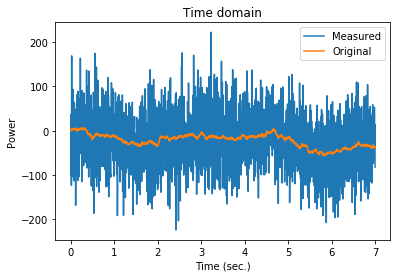

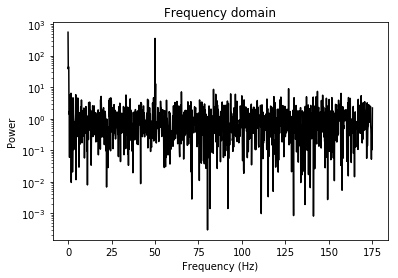

In [19]:
# simulation parameters
fs      = 350 # hz
timevec = np.arange(0,fs*7-1)/fs
npnts   = len(timevec)

# generate signal
yOrig = np.cumsum(np.random.randn(npnts))
y     = yOrig + 50*np.random.randn(npnts) + 40*np.sin(2*np.pi*50*timevec)

# power spectrum of signal
yX = np.abs(scipy.fftpack.fft(y)/npnts)**2
hz = np.linspace(0,fs/2,int(np.floor(npnts/2)+1))


# plot the data
plt.plot(timevec,y,label='Measured')
plt.plot(timevec,yOrig,label='Original')
plt.xlabel('Time (sec.)')
plt.ylabel('Power')
plt.title('Time domain')
plt.legend()
plt.show()

# plot its power spectrum
plt.plot(hz,yX[0:len(hz)],'k')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.title('Frequency domain')
plt.yscale('log')
plt.show()

/Users/elliottevers/DocumentsTurbulent/virtual_environments/python_3_jupyter/lib/python3.7/site-packages/scipy/fftpack/basic.py:160: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  z[index] = x


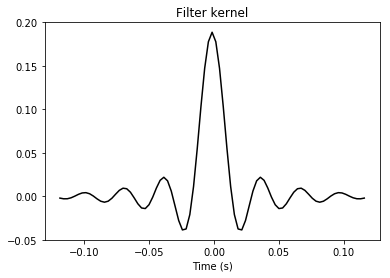

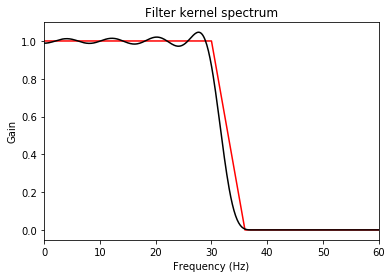

/Users/elliottevers/DocumentsTurbulent/virtual_environments/python_3_jupyter/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
/Users/elliottevers/DocumentsTurbulent/virtual_environments/python_3_jupyter/lib/python3.7/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/elliottevers/DocumentsTurbulent/virtual_environments/python_3_jupyter/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: Fu

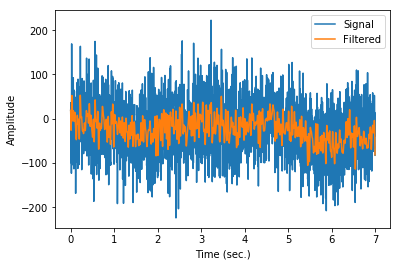

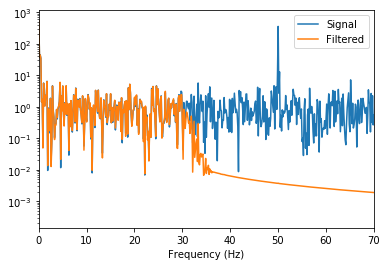

In [20]:
## now for lowpass filter

fcutoff = 30
transw  = .2
order   = np.round( 7*fs/fcutoff )+1

shape   = [ 1,1,0,0 ]
frex    = [ 0, fcutoff, fcutoff+fcutoff*transw, fs/2 ]

# filter kernel
filtkern = signal.firls(order,frex,shape,fs=fs)

# its power spectrum
filtkernX = np.abs(scipy.fftpack.fft(filtkern,npnts))**2



plt.plot(np.arange(-order/2,order/2)/fs,filtkern,'k')
plt.xlabel('Time (s)')
plt.title('Filter kernel')
plt.show()

plt.plot(np.array(frex),shape,'r')
plt.plot(hz,filtkernX[:len(hz)],'k')
plt.xlim([0,60])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.title('Filter kernel spectrum')
plt.show()


### now apply the filter to the data
yFilt = signal.filtfilt(filtkern,1,y)

plt.plot(timevec,y,label='Signal')
plt.plot(timevec,yFilt,label='Filtered')
plt.legend()
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude')
plt.show()

### power spectra of original and filtered signal
yOrigX = np.abs(scipy.fftpack.fft(y)/npnts)**2
yFiltX = np.abs(scipy.fftpack.fft(yFilt)/npnts)**2

plt.plot(hz,yOrigX[:len(hz)],label='Signal')
plt.plot(hz,yFiltX[:len(hz)],label='Filtered')
plt.xlim([0,fs/5])
plt.yscale('log')
plt.legend()
plt.xlabel('Frequency (Hz)')
plt.show()


---
# Windowed-sinc filters
---


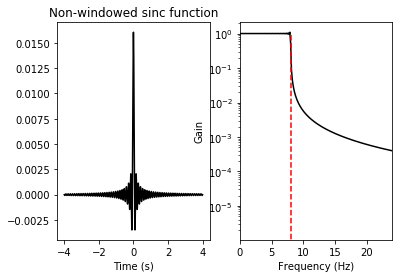

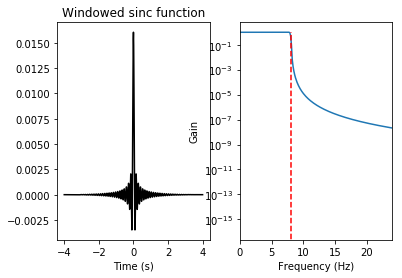

In [21]:
# simulation params
srate = 1000
time  = np.arange(-4,4,1/srate)
pnts  = len(time)

# create sinc function
f = 8
sincfilt = np.sin(2*np.pi*f*time) / time

# adjust NaN and normalize filter to unit-gain
sincfilt[~np.isfinite(sincfilt)] = np.max(sincfilt)
sincfilt = sincfilt/np.sum(sincfilt)

# windowed sinc filter
sincfiltW = sincfilt * np.hanning(pnts)


# plot the sinc filter
plt.subplot(121)
plt.plot(time,sincfilt,'k')
plt.xlabel('Time (s)')
plt.title('Non-windowed sinc function')


# plot the power spectrum
plt.subplot(122)
hz = np.linspace(0,srate/2,int(np.floor(pnts/2)+1))
pw = np.abs(scipy.fftpack.fft(sincfilt))
plt.plot(hz,pw[:len(hz)],'k')
plt.xlim([0,f*3])
plt.yscale('log')
plt.plot([f,f],[0,1],'r--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.show()



# now plot the windowed sinc filter
plt.subplot(121)
plt.plot(time,sincfiltW,'k')
plt.xlabel('Time (s)')
plt.title('Windowed sinc function')

plt.subplot(122)
pw = np.abs(scipy.fftpack.fft(sincfiltW))
plt.plot(hz,pw[:len(hz)])
plt.xlim([0,f*3])
plt.yscale('log')
plt.plot([f,f],[0,1],'r--')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.show()


/Users/elliottevers/DocumentsTurbulent/virtual_environments/python_3_jupyter/lib/python3.7/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]


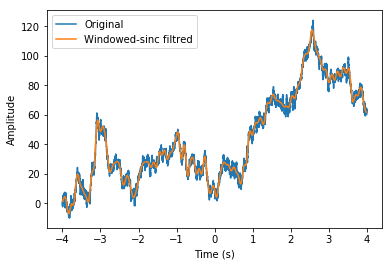

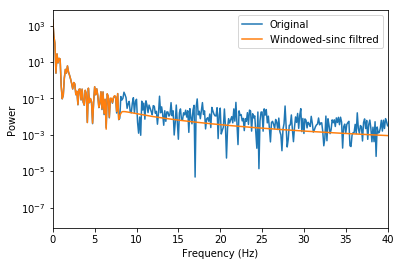

In [22]:
## apply the filter to noise

# generate data as integrated noise
data = np.cumsum( np.random.randn(pnts) )

# reflection
datacat = np.concatenate( (data,data[::-1]) ,axis=0)

# apply filter (zero-phase-shift)
dataf = signal.lfilter(sincfiltW,1,datacat)
dataf = signal.lfilter(sincfiltW,1,dataf[::-1])

# flip forwards and remove reflected points
dataf = dataf[-1:pnts-1:-1]

# compute spectra of original and filtered signals
powOrig = np.abs(scipy.fftpack.fft(data)/pnts)**2
powFilt = np.abs(scipy.fftpack.fft(dataf)/pnts)**2



# plot
plt.plot(time,data,label='Original')
plt.plot(time,dataf,label='Windowed-sinc filtred')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


# plot original and filtered spectra
plt.plot(hz,powOrig[:len(hz)],label='Original')
plt.plot(hz,powFilt[:len(hz)],label='Windowed-sinc filtred')
plt.xlim([0,40])
plt.yscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.legend()
plt.show()

/Users/elliottevers/DocumentsTurbulent/virtual_environments/python_3_jupyter/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


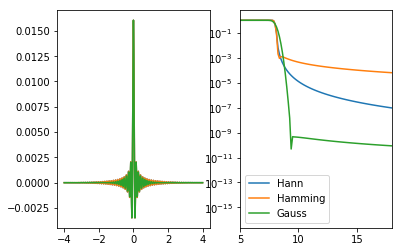

In [23]:
## with different windowing functions

sincfiltW = np.zeros((3,pnts))

tapernames = ['Hann','Hamming','Gauss']

# with Hann taper
# sincfiltW[0,:] = sincfilt * np.hanning(pnts)
hannw = .5 - np.cos(2*np.pi*np.linspace(0,1,pnts))/2
sincfiltW[0,:] = sincfilt * hannw


# with Hamming taper
#sincfiltW[1,:] = sincfilt * np.hamming(pnts)
hammingw = .54 - .46*np.cos(2*np.pi*np.linspace(0,1,pnts))
sincfiltW[1,:] = sincfilt * hammingw


# with Gaussian taper
sincfiltW[2,:] = sincfilt * np.exp(-time**2)



# plot them

for filti in range(0,len(sincfiltW)):
    plt.subplot(121)
    plt.plot(time,sincfiltW[filti,:])
    
    plt.subplot(122)
    pw = np.abs(scipy.fftpack.fft(sincfiltW[filti,:]))
    plt.plot(hz,pw[:len(hz)],label=tapernames[filti])
    plt.xlim([f-3,f+10])
    plt.yscale('log')
    

plt.legend()
plt.show()